# This is a work-in-progress notebook

We wish to know this:

1. How well does the model identify the correct number of senses for the target word?
2. **How well does the model identify the correct senses for the target word?**
3. **How well does the model assign the right words to a given sense of the target word?**
4. How well does the model assign the senses to the time intervals for the target word?

The script will evaluate **Q2** and **Q3**. Q4 will follow.

### Output filenames are based on target+param+iteration+K+variance

In [78]:
# Basic variables and imports:

import codecs, csv, os, time, re, io
from os import listdir
from os.path import isfile, join
from  more_itertools import unique_everseen

# directories

dir_in = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "src", "dynamic-senses","greek_input","all_results"))
dir_out = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_output"))
#dir_expert = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_input"))

dir_expert = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_input","new_texts"))
#  SENSES MERGED harmonia
#dir_expert = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "corpus_scripts_output")) 

dir_parameter = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "src", "dynamic-senses","greek_input","all_parameters"))

# change parameter file and senses etc here

genre = "all"  # "all" by default. To focus on a specific genre change the value, cfr "s_senses" file

s_senses = io.open(dir_expert+"/senses_69419.txt","r")  # expert senses annotation
k_senses = io.open(dir_in+"/3_output_K15/69419_fixed_time_no_ghost/output.dat","r") # model output
parameter_file = io.open(dir_parameter+"/parameters_v11_mus.txt","r")

bugfix = 0

target_id = os.path.basename(s_senses.name)
target_id = target_id.replace("senses_","")
target_id = target_id.replace(".txt","")
print("Target ID:",target_id)

param_name = os.path.basename(parameter_file.name)
param_name = param_name.replace("params","")
param_name = param_name.replace("parameters","")
param_name = param_name.replace(".txt","")


print(s_senses)
print(k_senses)
print(param_name)
print(dir_out+"/"+target_id+param_name)


# DEBUG:
#s_senses = io.open(dir_in+"/senses_69419_debug.txt","r")
#k_senses = io.open(dir_in+"/mus_debug.dat","r")
# k0 = mus4
# k1 = mus3
# k2 = mus2
# k3 = mus1
# k4 = nothing



file_senses = s_senses.readlines()[1:]
output_senses = k_senses.read()

#### SOME PARAMETERS ARE READ IN THE PARAMETER FILE

i = 0
for line in parameter_file.readlines():
    line = line.split("\t")
    if line[0] == "window_size":
        window_size = int(line[1])
        print("window_size",window_size)
            
    if line[0] == "iterations":
        iterations = int(line[1])
        print("iterations",iterations)
            
    if line[0] == "time_interval":
        time_interval = int(line[1])
        print("time_interval",time_interval)
        
    if line[0] == "num_top":
        num_top = int(line[1])
        print("num_top",num_top)
            
        
#### START TIME AND END TIME ARE NOW DEFINED BY READING THE ANNOTATION
## (because we have the same parameter file for all things)

annotation_dates = list()
for line in file_senses:
    cells = line.split("\t")
    
    if genre == "all":  # if we take everything
        annotation_dates.append(int(cells[0]))
    
    else:
        if cells[1] == genre:
            annotation_dates.append(int(cells[0]))
            
start_time = min(annotation_dates)
end_time = max(annotation_dates)

print("start_time",start_time)
print("end_time",end_time)

results_file = io.open(dir_out+"/"+target_id+param_name+"genre_"+genre+"_i"+str(iterations)+"_k"+str(num_top)+"_time_interval"+str(time_interval)+".txt","w")
print(results_file)

results_file.write("Target ID %s Window size %s Start time %s End time %s Time Interval %s Iterations %s\n" % (target_id,window_size,start_time,end_time,time_interval,iterations))

Target ID: 69419
<_io.TextIOWrapper name='/Users/hengchen/git/seed-semantic-change/evaluation/evaluation_input/new_texts/senses_69419.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/Users/hengchen/git/seed-semantic-change/src/dynamic-senses/greek_input/all_results/3_output_K15/69419_fixed_time_no_ghost/output.dat' mode='r' encoding='UTF-8'>
_v11_mus
/Users/hengchen/git/seed-semantic-change/evaluation/evaluation_output/69419_v11_mus
window_size 5
num_top 15
iterations 1000
time_interval 100
start_time -430
end_time 365
<_io.TextIOWrapper name='/Users/hengchen/git/seed-semantic-change/evaluation/evaluation_output/69419_v11_musgenre_all_i1000_k15_time_interval100.txt' mode='w' encoding='UTF-8'>


93

In [81]:
# Defining time periods from the output file

total_years = end_time-start_time
perioddd = 0
temp_start_time = start_time

for year in range(temp_start_time,end_time+1):
    if temp_start_time + time_interval < end_time+1:
        perioddd +=1
        #print(perioddd)
        temp_start_time += time_interval

number_of_slices = perioddd + 1

slice_duration = time_interval # read from the parameter file
print("slice duration",slice_duration)

print("start time:",start_time,"end time:",end_time)

slice_years = dict()

for period in range(0,number_of_slices):
    slice_years[period] = list()
    
   # if period == number_of_slices-1:
   #     for i in range(latest_i,end_time):
   #         slice_years[period].append(i)  
    
    #if period != number_of_slices-1:
    for i in range(start_time,end_time+1):
        
        if i >= int(period*slice_duration) + start_time:
            if i < int((period+1)*slice_duration) + start_time:
                slice_years[period].append(i)
                latest_i = i
                
#slice_years[period].append(latest_i+1)  #  in case we have a slice that ends on a century
                    
        
        
    

#print(slice_years)

slice duration 100
start time: -430 end time: 365


## TODO

- ~~create the notebook~~
- ~~organise the notebook~~
- ~~write "general idea" pseudocode for the evaluation~~
- ~~get input files~~
- ~~figure out data structures to store the variables~~
- ~~write actual code~~

## Q2: How well does the model identify the correct senses for the target word?

### Pseudocode 

# For each target word, we have a list of senses  s (given by the expert)
# For each target word, we have a list of senses k (given by the model)
# This Q consists in matching s and k, and doing so in a confident way --> confidence score

for each k:
    for each s:
        create conf(k,s)

# What is conf(k,s)?
        conf(k,s) = (p1*match(w1,s)+p2*match(w1,s)+px(wx,s))/10 WHERE
    
            px = probability of word wx 
                
                and
            
            match(wx,s) =   1/number_of_senses_assigned_to_wx if s_is_one_of_them 
            
                    or 
                            0 if w_is_not_associated_to_s
                
# Once we have gone through all s for one k, we have to choose the best k for s. How? (TBD, cfr Valerio and Barbara)

# Once all ks have been assigned to all ss (or NA), we can calculate a general confidence score for the model.
# One easy way to do that: 

conf_score_model = number_of_non_NA/k

### Real code

Steps:

- extract all senses from the file
- use those senses as keys for a dictionary, `dict_of_words`
- fill the dictionary: for each key, we store a list of words pertaining to that sense
- transform the lists as sets so as to remove duplicates within the same sense
- create a dictionary with a word as a key and its weight as a value, depending on how many senses it appears
- parse the model output and get the probability weights for each word
- do not take into account the first line
- take care of empty lines

Todo:




In [83]:
expert_senses = list() # list where we store all sense ids provided by expert
#sense_for_period_counter = 0


for line in file_senses:
    cells = line.split("\t")
    
    if genre == "all":  # if we take everything    
        sense = cells[11] # The sense ID is after the 10th tab
        if sense != 'w':
            if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                #print(int(s[12]))
                expert_senses.append(sense)    
            else:
                expert_senses.append("NA") # if the reason for finding the sense is not "collocates" (1), the sense NA is created
        else:
             expert_senses.append("NA")
                
    else: # specific genre only
        
        if cells[1] == genre:

            sense = cells[11] # The sense ID is after the 10th tab
            if sense != 'w':
                if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                    #print(int(s[12]))
                    expert_senses.append(sense)    
                else:
                    expert_senses.append("NA") # if the reason for finding the sense is not "collocates" (1), the sense NA is created
            else:
                 expert_senses.append("NA")


#print(len(expert_senses),expert_senses,len(set(expert_senses)))


expert_senses_set = list(set(expert_senses)) # we only keep the unique senses
expert_senses = list(unique_everseen(expert_senses))
#print("SET",expert_senses_set)
#print("ITERTOOLS",expert_senses)

number_of_s = len(expert_senses)  # we create a variable that stores the number of unique senses
print("Number of senses:",number_of_s,expert_senses)

# This dictionary has a sense as a key, and a list of words as a value. 
dict_of_words = dict()
# This list stores all words
list_of_all_words = list()
# This dictionary stores all words as keys and their weight as value
word_weight = dict()
# This dictionary stores the number of times a sense appears in a slice
sense_date_amount = dict()

# This list stores words in w and not collocates senses
list_of_NA_words = list()

dummy_counter = 0


sentences_smaller_than_window_size = 0

for i in range(0,number_of_s): # for each sense, we create a dictionary entry which has a list as value
    dict_of_words[expert_senses[i]] = list()
    #print(expert_senses[i])

    for line in file_senses: # we go back in the file
        
        
        
        cells = line.split("\t") # splitting on tabs
        
        if genre == "all":   # all genres
            
            if int(cells[12]) == 1:  # senses inferred from collocates
                if cells[11] == expert_senses[i]:      # we store all words for one sense 


                    sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                    list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces


                    index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                    list_of_ids_window = list()
                    for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                        try:   # if there's a word it's taken into account

                            list_of_ids_window.append(list_of_ids[n])

                        except IndexError: # if there isn't, too bad
                            sentences_smaller_than_window_size += 1

                    for word_id in list_of_ids_window:
                        if int(cells[12]) == 1:


                            if cells[11] == expert_senses[i]:  

                                dict_of_words[expert_senses[i]].append(word_id)                    

                        list_of_all_words.append(word_id) # we store all words, we'll iterate over that for scores


                # if the sense is "w", the collocates are put in the "NA words"

                if cells[11] == "w":
                    #print("W")
                    sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                    list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                    index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                    list_of_ids_window = list()
                    for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                        try:   # if there's a word it's taken into account

                            list_of_NA_words.append(list_of_ids[n])
                            list_of_all_words.append(list_of_ids[n])
                        except IndexError:
                            dummy_counter +=1

            else:  # words that are in "non collocates senses"
                #print("NON COLOC")
                sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                #print(sentence_of_ids)
                list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                #print(index_of_target)
                list_of_ids_window = list()
                #print(index_of_target-window_size,index_of_target+window_size+1)
                for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                    try:   # if there's a word it's taken into account
                        #print(list_of_ids_window)
                        #print(list_of_ids[n])
                        list_of_NA_words.append(list_of_ids[n])
                        list_of_all_words.append(list_of_ids[n])
                    except IndexError:
                            dummy_counter +=1
                #print(list_of_NA_words)
                
        else:
            
            if cells[1] == genre:
                if int(cells[12]) == 1:  # senses inferred from collocates
                    if cells[11] == expert_senses[i]:      # we store all words for one sense 


                        sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                        list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces


                        index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                        list_of_ids_window = list()
                        for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                            try:   # if there's a word it's taken into account

                                list_of_ids_window.append(list_of_ids[n])

                            except IndexError: # if there isn't, too bad
                                sentences_smaller_than_window_size += 1

                        for word_id in list_of_ids_window:
                            if int(cells[12]) == 1:


                                if cells[11] == expert_senses[i]:  

                                    dict_of_words[expert_senses[i]].append(word_id)                    

                            list_of_all_words.append(word_id) # we store all words, we'll iterate over that for scores


                    # if the sense is "w", the collocates are put in the "NA words"

                    if cells[11] == "w":
                        #print("W")
                        sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                        list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                        index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                        list_of_ids_window = list()
                        for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                            try:   # if there's a word it's taken into account

                                list_of_NA_words.append(list_of_ids[n])
                                list_of_all_words.append(list_of_ids[n])
                            except IndexError:
                                dummy_counter +=1

                else:  # words that are in "non collocates senses"
                    #print("NON COLOC")
                    sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                    #print(sentence_of_ids)
                    list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                    index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                    #print(index_of_target)
                    list_of_ids_window = list()
                    #print(index_of_target-window_size,index_of_target+window_size+1)
                    for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                        try:   # if there's a word it's taken into account
                            #print(list_of_ids_window)
                            #print(list_of_ids[n])
                            list_of_NA_words.append(list_of_ids[n])
                            list_of_all_words.append(list_of_ids[n])
                        except IndexError:
                                dummy_counter +=1
                    #print(list_of_NA_words)





            
            
            
            
            
            
            
            
            
    # Here, we remove duplicates
    #dict_of_words[expert_senses[i]].append("79223") #testing
    
    dict_of_words[expert_senses[i]] = list(set(dict_of_words[expert_senses[i]]))
    
    
      
    #print("i",i,"sense",expert_senses[i],"number of words",len(dict_of_words[expert_senses[i]]))
    #print("words",set(dict_of_words[expert_senses[i]]))
    #print("\n\n")

# NOW THAT WE HAVE A LIST OF NA WORDS 
# We can put that in the dict_of_words[expert_sense] dictionary
#print("NA words",list_of_NA_words)
list_of_NA_words = list(set(list_of_NA_words))
dict_of_words["NA"] = list_of_NA_words

print("sentences smaller than window size",window_size,":",sentences_smaller_than_window_size)
#print("dummy",dummy_counter)
print("number of NA words:",len(list_of_NA_words))
print("same?",len(dict_of_words["NA"]))

results_file.write("Expert senses %s Total %s \n" %(expert_senses,len(expert_senses)))

Number of senses: 4 ['mus-1', 'NA', 'mus-4', 'mus-2']
sentences smaller than window size 5 : 155
number of NA words: 498
same? 498


57

In [85]:
sense_date_amount = dict() # dict where we have the number of senses for [sense,period]

# this dictionary is now initialised with 0 for each CORRECT sense,period pair we have
for sense in expert_senses:
    for period in slice_years.keys():
        sense_date_amount[sense,period] = 0
        
#print(sense_date_amount,"\n")        

counter = 0

for line in file_senses: 
    #print(len(file_senses))
    cells = line.split("\t")
    
    if genre == "all":
    
        sense = cells[11] # The sense ID is after the 10th tab
        if sense != 'w':
            #print(sense)


            if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                #print(int(s[12]))
                #expert_senses.append(sense)

                for period in slice_years.keys():
                    if int(cells[0]) in slice_years[period]:
                        #sense_for_period_counter += 1
                        sense_date_amount[sense,period] += 1
                        counter += 1

            else:
                for period in slice_years.keys():
                    if int(cells[0]) in slice_years[period]:
                        #sense_for_period_counter += 1
                        sense_date_amount["NA",period] += 1
                        counter += 1



        if sense == "w":  # counting the NAs
                for period in slice_years.keys():
                    if int(cells[0]) in slice_years[period]:
                        #sense_for_period_counter += 1
                        sense_date_amount["NA",period] += 1
                        counter += 1
                    

    else:
        if genre == cells[1]:
            sense = cells[11] # The sense ID is after the 10th tab
            if sense != 'w':
                #print(sense)


                if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                    #print(int(s[12]))
                    #expert_senses.append(sense)

                    for period in slice_years.keys():
                        if int(cells[0]) in slice_years[period]:
                            #sense_for_period_counter += 1
                            sense_date_amount[sense,period] += 1
                            counter += 1

                else:
                    for period in slice_years.keys():
                        if int(cells[0]) in slice_years[period]:
                            #sense_for_period_counter += 1
                            sense_date_amount["NA",period] += 1
                            counter += 1



            if sense == "w":  # counting the NAs
                    for period in slice_years.keys():
                        if int(cells[0]) in slice_years[period]:
                            #sense_for_period_counter += 1
                            sense_date_amount["NA",period] += 1
                            counter += 1
                    
print("sense_date_amount",sense_date_amount)
print(counter)

sense_date_amount {('mus-1', 0): 3, ('mus-1', 1): 4, ('mus-1', 2): 1, ('mus-1', 3): 2, ('mus-1', 4): 2, ('mus-1', 5): 14, ('mus-1', 6): 14, ('mus-1', 7): 0, ('NA', 0): 16, ('NA', 1): 3, ('NA', 2): 3, ('NA', 3): 2, ('NA', 4): 6, ('NA', 5): 15, ('NA', 6): 45, ('NA', 7): 1, ('mus-4', 0): 21, ('mus-4', 1): 0, ('mus-4', 2): 0, ('mus-4', 3): 1, ('mus-4', 4): 0, ('mus-4', 5): 21, ('mus-4', 6): 8, ('mus-4', 7): 1, ('mus-2', 0): 0, ('mus-2', 1): 0, ('mus-2', 2): 0, ('mus-2', 3): 0, ('mus-2', 4): 0, ('mus-2', 5): 0, ('mus-2', 6): 22, ('mus-2', 7): 0}
205


In [86]:
# For every word in the list of words that we have
# we count the number of senses it appears in
# we use that number to divide its importance: 1 sense = 1 importance; 2 senses = 0.5 importance
# this can be finetuned

print(expert_senses)
#print("list_of_NA_words",list_of_NA_words,"\n\n")
#print("list of mus 1 words",dict_of_words['mus-1'])

# This dictionary stores words in w and not collocates senses
word_weight_NA = dict()

for word in list_of_all_words:
#word = "113560"
    x = 0  # number of times word appears in different senses excluding NAs
    z = 0 # number of times word appears in different senses including NAs
#print(word)
    for i in range(0,number_of_s):
        if word in dict_of_words[expert_senses[i]]:
            #if word == "105344":
            #    print("YO")
                
            if expert_senses[i] != "NA":
                x += 1 
                #print("froot the loop")
                

    if x != 0:
        word_weight[word] = float(1/x)
        #print(word,"this is a x!=0",x,"this is its weight",float(1/x))
        
        if word in list_of_NA_words:
            z = x + 1
            #print(z)
            #print(word,"this is a z",z,"this is its weight",float(1/z))
            
            word_weight_NA[word] = float(1/z)
            
    else:  # if word doesn't exist in non-NA senses
        word_weight_NA[word] = 1/1
        word_weight[word] = 0  # with this we prevent the case that a word that is ONLY in NA has no weight 
  
        
    #else: 
    #    word_weight_NA[word] = word_weight[word]
        
#print(word_weight_NA)    
#print(word,word_weight[word])

#print(word_weight_NA["53826"])

#for key in word_weight_NA.keys():
#    print(key,word_weight_NA[key])


#for word in list_of_all_words:
#    try: 
#        print(word,word_weight[word])
#    except KeyError:
#        print(word,"isnt in non-NA senses")
#    try:
#        print(word,word_weight_NA[word])
#    except KeyError:
#        print(word,"isnt in NA sense")

['mus-1', 'NA', 'mus-4', 'mus-2']


#### parsing output.dat
- split on "===============  per time  ===============" and keep first part
- transform that into a list, then
- get lines that start with "p(w|s)"
- count those, k = that number
- split the line on ":", keep the second part
- split the rest on ";", it's [ID] = prob_from_this_ID

In [87]:
lines_output = output_senses.split("===============  per time  ===============")[0].split("\n")

number_of_the_k = 0

k_words_with_prob = dict()

for line in lines_output:
    if line[:6] == "p(w|s)":
        #print(line)
        line = line.split(":")[1]
        line = line.split(";")
        #print(number_of_the_k,line)
        dico_word_prob = dict()
        temp_dict = dict()
        k_words_with_prob[number_of_the_k] = list()
        
        line = line[:-1] # last item of the list is empty
        
        total_probability = 0 # to have relative probs
        #print(line)
        for word_prob in line:
            #print(word_prob)

        
            #word_prob = word_prob.split(",")
            #for word in word_prob:
            probability = re.findall("([\d.\w]*)",word_prob)
            if probability:
                probability = list(filter(None,probability))
                    
            total_probability += float(probability[1])
            #print("word id",probability[0],"; probability",probability[1])
        
            dico_word_prob[probability[0]] = float(probability[1])
        #print(type(k_words_with_prob[number_of_the_k]))
        
        for i in dico_word_prob.keys():
            
            temp_dict[i] = float(dico_word_prob[i]/total_probability)
            k_words_with_prob[number_of_the_k] = temp_dict
            
            #print(k_words_with_prob[number_of_the_k])
            
        #k_words_with_prob[number_of_the_k] = [float(dico_word_prob[i]/total_probability) for i in dico_word_prob]
        #print(k_words_with_prob[number_of_the_k])
        #print(temp_dict)
        number_of_the_k += 1
        

results_file.write("Output senses %s \n\n" %(number_of_the_k))

19

#### k_words_with_prob
This dictionary has the sense number 'k' as keys and the a dictionary of [word] = probability as values.
Example below.

In [89]:
#for key in k_words_with_prob.keys():
    #print("output sense",key)
    #for i in range(0,number_of_s):
        #print("\texpert sense number ", i, expert_senses[i])
        #for second_key in k_words_with_prob[key].keys(): # Barbara's note: shouldn't it be k_words_with_prob[i] here?
            #print("\t\tword from annotation for sense", key, ":", second_key)
            #if second_key in dict_of_words[expert_senses[i]]:
                #if expert_senses[i] != "NA":
                    #print("\t\t\t\tnormal")
                    #print("\t\t\tword ", second_key, "is in output for sense", key, "with probability:", k_words_with_prob[key][second_key], "and weight:", word_weight[second_key])

                #else:
                    #print("\t\t\t\tNA")
                    #print("\t\t\tword ", second_key, "is in output for sense", key, "with probability:", k_words_with_prob[key][second_key], "and weight:", word_weight_NA[second_key])

                
# Here we get all the senses and for each sense we do a matching between the k words and s words and get the probability
# For some reason the first word for each sense arrives several times


In [90]:
print(expert_senses)

['mus-1', 'NA', 'mus-4', 'mus-2']


In [92]:
## Calculating confidence score for each (words_of_k,words_of_s) pair

# conf(k,s) = (p1*match(w1,s)+p2*match(w1,s)+px(wx,s))
        # match(wx,s) =   1/number_of_senses_assigned_to_wx if s_is_one_of_them 

    
print("number of expert senses s:",number_of_s)
print("number of model output senses k:",len(k_words_with_prob.keys()))
compteur = 0

match = dict()
conf = dict()
for k in k_words_with_prob.keys():  # for each output sense, we go through...
    #print("\n")
    #print("Choose best match for k =",k)
    for s in range(0,number_of_s):       # each expert sense
        
        conf[k,s] = 0 
        
        #print("expert sense",s)
        for mot in k_words_with_prob[k]:      # for each word within output by the model for the output sense
            #print("k,mot",k,mot)
            #print("s",s,"expert_senses[s]",expert_senses[s])
            
            if expert_senses[s] == "NA":
                
                if mot in dict_of_words[expert_senses[s]]:  # if that word exists in the list of expert words for that sense

                    #print("s,dict_of_words[expert_senses[s]])",dict_of_words[expert_senses[s]])
                    #print("k_words_with_prob[k][mot]",k_words_with_prob[k][mot])
                    #print("word_weight[mot]",word_weight_NA[mot])

                    #for word in list_of_all_words:  # this help getting a key for a dictionary later on
                     #   if mot == word:
                    match_weighted = float((k_words_with_prob[k][mot]))*word_weight_NA[mot] #this dictionary cfr comment on line 24
                            # word_weight[word] is already "1/number_of_expert_senses_assigned_to_this_word"

                    #print("sense",expert_senses[s],"mot",mot,"match_weighted",match_weighted)

                            #print(k,s,conf[k,s])


                            # To fix? 
                            # The way the code works is that all matches happen number_of_s times
                            # (number_of_s = number of expert senses)
                            # easy fix is to divide the match score by number_of_s

                    conf[k,s] = conf[k,s] + match_weighted#/4

                
                
            else:    
 
                if mot in dict_of_words[expert_senses[s]]:  # if that word exists in the list of expert words for that sense

                    #print("s,dict_of_words[expert_senses[s]])",dict_of_words[expert_senses[s]])
                    #print("k_words_with_prob[k][mot]",k_words_with_prob[k][mot])
                    #print("word_weight[mot]",word_weight[mot])

                    #for word in list_of_all_words:  # this help getting a key for a dictionary later on
                     #   if mot == word:
                    match_weighted = float((k_words_with_prob[k][mot]))*word_weight[mot] #this dictionary cfr comment on line 24
                            # word_weight[word] is already "1/number_of_expert_senses_assigned_to_this_word"

                    #print("sense",expert_senses[s],"mot",mot,"match_weighted",match_weighted)

                            #print(k,s,conf[k,s])


                            # To fix? 
                            # The way the code works is that all matches happen number_of_s times
                            # (number_of_s = number of expert senses)
                            # easy fix is to divide the match score by number_of_s

                    conf[k,s] = conf[k,s] + match_weighted#/4

                    #else: 
                        #print(word,"has no match for sense",expert_senses[s])
                        #print(word,word_weight[word],"match",k_words_with_prob[k][mot],"match weighted",match_weighted)
                    #print("test1")
                #print("test2")
                
                    #compteur += 1
                
        #if (k,s) in conf.keys():
        
            #conf[k,s] = conf[k,s] # with or without /10
            #print("k =",k,"\t s =",s,"(= expert sense",expert_senses[s],")\t conf[k,s] =",conf[k,s])
            
            #print(compteur)
            
    #print(k_words_with_prob[k])


number of expert senses s: 4
number of model output senses k: 15


In [93]:
print(conf)

k_s_match = dict()  # k_s_match[k] = s

for k in range(0,number_of_the_k):
    #print("k",k)
    liste_temp = list()
    best_s_for_k = "NA"
    conf[k,best_s_for_k] = -1

    
    for s in range(0,len(expert_senses)):
        #print("conf[k,s]",conf[k,s],"s",s,"best s for k",best_s_for_k)
        #print(type(conf[k,s]))
        liste_temp.append(conf[k,s])
        
        
        try:
            if conf[k,s] > conf[k,best_s_for_k]: 
                #print("NEW best_s:",s)
                best_s_for_k = s
                
        except KeyError:
            print("key error should not happen")
        
    sorted_liste_temp = sorted(liste_temp, reverse=True)
    

    
    #print("k, best s:",k,best_s_for_k)
    if conf[k,best_s_for_k] > sorted_liste_temp[1] + sorted_liste_temp[2]: # if the MAX is higher than the sum of the following two
        
        if conf[k,best_s_for_k] > 1/(len(expert_senses)+1): # if the MAX is higher than the random baseline (number of sense + NA)
            k_s_match[k] = best_s_for_k
            print("MATCH: k",k,"s",best_s_for_k)
            print("\tmax:",sorted_liste_temp[0])
            print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
            results_file.write("MATCH: k %s and s %s \n" %(k,best_s_for_k))
            
        else:
            print("NO MATCH: k",k,"the best s was",best_s_for_k,"reason: max < 1/(# of expert senses+1)")
            print("\tmax:",sorted_liste_temp[0])
            print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
            k_s_match[k] = "NA"
    else:
        print("NO MATCH: k",k,"the best s was",best_s_for_k,"reason: max < max2+max3")
        print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
        k_s_match[k] = "NA"
        
        #if conf[k,best_s_for_k] > 1/(len(expert_senses)+1):
         #   print("also: reason: max < 1/(# of expert senses+1)\n")

{(0, 0): 0.08564231738035263, (0, 1): 0.7188287153652391, (0, 2): 0.260705289672544, (0, 3): 0.013853904282115867, (1, 0): 0.40566037735849053, (1, 1): 0.1761006289308176, (1, 2): 0.410377358490566, (1, 3): 0.1349056603773585, (2, 0): 0.15499999999999997, (2, 1): 0.8668749999999997, (2, 2): 0.024999999999999994, (2, 3): 0, (3, 0): 0.06990014265335234, (3, 1): 0.4957203994293865, (3, 2): 0.14407988587731813, (3, 3): 0.36233951497860195, (4, 0): 0.33542538354253826, (4, 1): 0.19200371920037185, (4, 2): 0.48884239888423975, (4, 3): 0.04323570432357042, (5, 0): 0.1430084745762712, (5, 1): 0.48022598870056493, (5, 2): 0.30508474576271183, (5, 3): 0.1260593220338983, (6, 0): 0.11850311850311851, (6, 1): 0.4873527373527373, (6, 2): 0.2806652806652807, (6, 3): 0.2006237006237006, (7, 0): 0.10248112189859762, (7, 1): 0.2337288745055735, (7, 2): 0.7605177993527508, (7, 3): 0, (8, 0): 0.4634502923976607, (8, 1): 0.6296296296296294, (8, 2): 0.045321637426900575, (8, 3): 0, (9, 0): 0.41531322505800

In [94]:
# For all k->s pair we have in the k_s_match dictionary, we create the inverted dictionary :
# s_k_match[s] contains all the k assigned to that s

s_k_match = dict()
print(k_s_match)
for key in k_s_match.keys():
    try: 
        s_k_match[k_s_match[key]].append(key)
        
    except KeyError:
        s_k_match[k_s_match[key]] = list()
        s_k_match[k_s_match[key]].append(key)
        
print("for each s, the k (or more) assigned to it:",s_k_match)
#print(expert_senses[3])        
        
    

{0: 1, 1: 'NA', 2: 1, 3: 'NA', 4: 'NA', 5: 1, 6: 1, 7: 2, 8: 1, 9: 'NA', 10: 3, 11: 1, 12: 'NA', 13: 'NA', 14: 0}
for each s, the k (or more) assigned to it: {1: [0, 2, 5, 6, 8, 11], 'NA': [1, 3, 4, 9, 12, 13], 2: [7], 3: [10], 0: [14]}


## Q3: How well does the model assign the right words to a given sense of the target word?

# For each k, we use the words given by the expert as unquestionable truth.
# Judging the model's assignment of words to a given sense becomes a question of precision and recall.

# precision is all correct w weighted by their respective probabilities / all w weighted by their probabilities

for each k:
    for each w:
        if w in expert_list:
            w_weight = p*1
            numerator += w_weight
        w_weight = p*1
        denominator += w_weight
    precision = numerator/denominator
    
# recall is all correct w weighted by their respective probabilities / all w assigned to the sense by the expert
for each k:
    for each w:
        if w in expert_list:
            w_weight = p*1
            numerator += w_weight
    denominator = len(expert_list)
    recall = numerator/denominator
    
# f-score can be used as well

for each k:
    f_score = 2 * precision * recall / (precision+recall)

## TODO : 
1. ~~create another word_weight[] only for NA~~
2. ~~in this word_weight[], a word that is in an NA (either because w or !=1) has its weight 1/senses, BUT THAT DOES NOT AFFECT THE real word_weight[]~~
3. when a k,s match is correctly NA: precision and recall cfr picture

ALSO:
1. ~~create a s_k_match dictionary that maps s with one or more k assigned by the model. This allows to calculate a new P and R~~
2. ~~s_k_match[s] = [kx, ky] (based on matches)~~
3. ~~precision and recall for each s, and averaged precisions and recalls as well~~


### This is Pr and Re for Ks -> not taken into account

precision_recall_k = dict()

print("\t\t\tTHIS IS P and R FOR Ks, WE LOOK AT P and R for Ss now: below\n\n\n")

for key in k_s_match.keys():
    precision_recall_k[key] = list() # this list has first the recall then the precision then the f score
    numerator_recall = 0
    denominator_precision = 0
    numerator_precision = 0
    denominator_recall = 0
   # print()



############# NEED TO ADJUST FOR PAIRS THAT ARE NAs  --> actually no


    if k_s_match[key] == "NA":
        print("K",key,"s is NA")

    else: 
    
        for word in k_words_with_prob[int(key)]: 
            w_weight_precision = k_words_with_prob[int(key)][word] * 1
            denominator_precision += float(w_weight_precision)
        
        
        
            if word in dict_of_words[expert_senses[int(k_s_match[key])]]:   
                w_weight_recall = k_words_with_prob[int(key)][word] * 1
                numerator_recall += float(w_weight_recall)

                numerator_precision += float(w_weight_precision)
    
        for mot in dict_of_words[expert_senses[int(k_s_match[key])]]:
            denominator_recall += word_weight[mot]
        

    #denominator_recall = len(dict_of_words[expert_senses[int(key[2])]])
    #numerator_recall = numerator_recall*10
     
    
        #print("For pair ks",key,k_s_match[key],":")
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[expert_senses[k_s_match[key]]])
    
        precision_recall_k[key].append(recall)
    
        #print(len(dict_of_words[expert_senses[k_s_match[key]]]))
        #print("The RECALL is",numerator_recall,"/",denominator_recall,"=",recall) 
        if numerator_precision == 0:
            print("The PRECISION IS NA")
        else:
            precision = numerator_precision/denominator_precision
            print("The PRECISION is",numerator_precision,"* number of expert words in that sense/",denominator_precision,"=",precision,"\n")
            precision_recall_k[key].append(precision)
        
        if (numerator_precision/denominator_precision)+(numerator_recall/denominator_recall) != 0: 
            fscore = (2*(precision)*(recall)/((precision)+(recall)))
            print("The F-SCORE is", fscore,"\n")
            precision_recall_k[key].append(fscore)
        
        else:
            print("No F-SCORE, can't divide by 0\n\n")
        

## P and R based on S, with adapted word weight for NA

In [50]:
print(s_k_match)
print(expert_senses)

{1: [0, 2, 5, 6, 8, 11], 'NA': [1, 3, 4, 9, 12, 13], 2: [7], 3: [10], 0: [14]}
['mus-1', 'NA', 'mus-4', 'mus-2']


In [96]:

### note
recall_precision_s = dict()
print(s_k_match)
#print(dict_of_words)

for key in s_k_match.keys():
    recall_precision_s[key] = list() # this list has first the recall then the precision then the f score
    numerator_recall = 0
    denominator_precision = 0
    numerator_precision = 0
    denominator_recall = 0
   # print()
    #print("s and k:",key,s_k_match[key])
    
    for any_k in range(0,len(s_k_match[key])):
        #print("s",key,"k",s_k_match[key],s_k_match[key][any_k])
        #print("s_k_match[key][any_k]",s_k_match[key][any_k])
      
        for word in k_words_with_prob[any_k]:
              
            denominator_precision += float(k_words_with_prob[any_k][word])
                
            #print(word,key)
                        
            # if key is not NA then do that, OTHERWISE use dict_of_words[key]
            
            if key != "NA":
                if word in dict_of_words[expert_senses[key]]:
                        #print("this word is in k",any_k,"and in sense",expert_senses[key],word)

                    numerator_precision += float(k_words_with_prob[any_k][word])
                    numerator_recall += float(k_words_with_prob[any_k][word])

            elif key == "NA":
                if word in dict_of_words[key]:
                        #print("this word is in k",any_k,"and in sense",expert_senses[key],word)

                    numerator_precision += float(k_words_with_prob[any_k][word])
                    numerator_recall += float(k_words_with_prob[any_k][word])
                
        ### SINCE WE HAVE the possibility of having two (or more) k for each s, the expert s words should be counted k times
        
        if key != "NA":
            if expert_senses[key] != "NA":
                for mot in dict_of_words[expert_senses[key]]:
                    denominator_recall += word_weight[mot]
                
            if expert_senses[key] == "NA":
                for mot in dict_of_words[expert_senses[key]]:
                    denominator_recall += word_weight_NA[mot]
                
        if key == "NA":
            for mot in dict_of_words[key]:
                denominator_recall += word_weight_NA[mot]
                
    #if key != "NA":
    
    
    if key != "NA":
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[expert_senses[key]])
        recall_precision_s[key].append(recall)

        precision = numerator_precision/denominator_precision
        recall_precision_s[key].append(precision)

        fscore = (2*(precision)*(recall)/((precision)+(recall)))
        recall_precision_s[key].append(fscore)
        
    if key == "NA":
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[key])
        recall_precision_s[key].append(recall)

        precision = numerator_precision/denominator_precision
        recall_precision_s[key].append(precision)

        fscore = (2*(precision)*(recall)/((precision)+(recall)))
        recall_precision_s[key].append(fscore)
        
        
   # else: # this must be changed for NAs
        #recall_precision_s[key].append(0)
    
                    
    print("num precision",numerator_precision,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("denom precision",denominator_precision,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("num recall",numerator_recall,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("denom recall",denominator_recall,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("recall:",recall)
    print("precision:",precision)
    print("fscore:",fscore)
    results_file.write("SCORES FOR PAIR S= %s <-> {K...K}= %s: P %s R %s F %s \n" %(key,s_k_match[key],precision,recall,fscore))
        
    
    print("\n")


{1: [0, 2, 5, 6, 8, 11], 'NA': [1, 3, 4, 9, 12, 13], 2: [7], 3: [10], 0: [14]}
num precision 3.55814716502066 for s 1 and a total of 6 k
denom precision 5.999999999999999 for s 1 and a total of 6 k
num recall 3.55814716502066 for s 1 and a total of 6 k
denom recall 2632.0000000000014 for s 1 and a total of 6 k
recall: 0.6732360517402309
precision: 0.5930245275034435
fscore: 0.6305897822705654


num precision 3.55814716502066 for s NA and a total of 6 k
denom precision 5.999999999999999 for s NA and a total of 6 k
num recall 3.55814716502066 for s NA and a total of 6 k
denom recall 2632.0000000000014 for s NA and a total of 6 k
recall: 0.6732360517402309
precision: 0.5930245275034435
fscore: 0.6305897822705654


num precision 0.28841309823677574 for s 2 and a total of 1 k
denom precision 0.9999999999999997 for s 2 and a total of 1 k
num recall 0.28841309823677574 for s 2 and a total of 1 k
denom recall 236.66666666666669 for s 2 and a total of 1 k
recall: 0.30709901727746824
precision: 

In [52]:
type(expert_senses)
print(str(expert_senses))

['mus-1', 'NA', 'mus-4', 'mus-2']


In [100]:
#print(precision_recall_k)
#total_recall = 0
#total_precision = 0
#total_fscore = 0
#for key in precision_recall_k:
#    try:
#        total_recall += precision_recall_k[key][0]
#    except IndexError:
#        print("nothing for k",key)
#    try: 
#        total_precision += precision_recall_k[key][1]
#    except IndexError:
#        print("nothing for k",key)
#        
#    try: 
#        total_fscore += precision_recall_k[key][2]
#    except IndexError:
#        print("nothing for k",key)
#        
#        
#print("AVERAGED SCORES BASED ON Ks:")    
#print("averaged recall = ",total_recall/number_of_the_k)
#print("averaged precision = ",total_precision/number_of_the_k)
#print("averaged fscore = ",total_fscore/number_of_the_k)
#print("\n")


print(recall_precision_s)
total_recall = 0
total_precision = 0
total_fscore = 0
for key in recall_precision_s:
    try:
        total_recall += recall_precision_s[key][0]
    except IndexError:
        print("nothing for s",key)
    try: 
        total_precision += recall_precision_s[key][1]
    except IndexError:
        print("nothing for s",key)
        
    try: 
        total_fscore += recall_precision_s[key][2]
    except IndexError:
        print("nothing for s",key)
        


print("\n\n\tAVERAGED SCORES BASED ON Ss:")    
print("averaged recall = ",total_recall/len(expert_senses))  # or should I divide by the number of Ks?
print("averaged precision = ",total_precision/len(expert_senses))
print("averaged fscore = ",total_fscore/len(expert_senses))
results_file.write("Averaged scores: P %s R %s F %s\n\n" %(total_precision/len(expert_senses),total_recall/len(expert_senses),total_fscore/len(expert_senses)))

{0: [3.9903682184080425, 0.818639798488665, 1.358564686411625], 1: [], 2: [4.453972267536703, 0.9137500000000001, 1.5164037767286864], 3: [], 4: [], 5: [2.870932065142256, 0.5889830508474577, 0.9774403531975582], 6: [2.9590880879624764, 0.607068607068607, 1.0074540393896128], 7: [0.8798577875017091, 0.8263214670981662, 0.8522496986715056], 8: [3.890959045247702, 0.7982456140350876, 1.3247197415922476], 9: [], 10: [0.5360856398229781, 0.5036674816625917, 0.5193711826117674], 11: [4.684994845825118, 0.9611451942740287, 1.5950579508418758], 12: [], 13: [], 14: [0.759973244147157, 0.72, 0.7394467946631954]}
nothing for k 1
nothing for k 1
nothing for k 1
nothing for k 3
nothing for k 3
nothing for k 3
nothing for k 4
nothing for k 4
nothing for k 4
nothing for k 9
nothing for k 9
nothing for k 9
nothing for k 12
nothing for k 12
nothing for k 12
nothing for k 13
nothing for k 13
nothing for k 13
AVERAGED SCORES BASED ON Ks:
averaged recall =  1.6684154134396099
averaged precision =  0.4491

82

In [57]:
print(expert_senses)

['mus-1', 'NA', 'mus-4', 'mus-2']


In [58]:
#for i in expert_senses:
    #print(i,dict_of_words[i])

## Qx: Model(s) comparison against annotated subcorpus (sense importance evolution + sense emergence)

In [101]:
#for key in slice_years.keys():
#    print(key,slice_years[key],"\n")

## getting the number of hits per sense per period

sense_date_amount = dict()

for sense in sense_year.keys():
   
    print("Sense:",sense)
    counter = 0
    for i in range(0,number_of_slices):
        #print("period",i,"years for that sense in that period",sense_year[sense])
        
        
        
        #print(sense_year[sense])
        for year in sense_year[sense]:
        
            if year in slice_years[i]:
                counter += 1
                #print(sense_year[sense][i])
                
        sense_date_amount[sense,i] = counter           
    print(sense,counter)
    
print(sense_date_amount)

## getting the relative number of hits per sense per period
(for plotting)

In [104]:
total_period = dict()

sense_period_relative = dict()

for i in range(0,number_of_slices):
    for entry in expert_senses:
        
# for period i we store for each sense the number of times the sense is seen
        
        try:
            total_period[i] += sense_date_amount[entry,i]
        except KeyError:
            total_period[i] = 0
            total_period[i] += sense_date_amount[entry,i]
            
        #print(i,entry,"+",sense_date_amount[entry,i],"=",total_period[i])
        
        
print("total period",total_period)
print("sense date amount",sense_date_amount)
        
for key in sense_date_amount:
    
    # for each (sense,period) pair we divide the number by the total number of words at that period
    
    #print(key,"total for this sense at this period",sense_date_amount[key],"total period",total_period[key[1]])
    
    if total_period[key[1]] != 0:
        sense_period_relative[key] = float(sense_date_amount[key]/total_period[key[1]])
    else:
        sense_period_relative[key] = 0
    #print("relative",sense_period_relative[key])
  
print(sense_period_relative)        

period_relative = dict()
temp_list = list()

for i in range(0,number_of_slices):
    temp_list = list()
    for entry in expert_senses:
        if len(temp_list) < len(expert_senses):
            temp_list.append(sense_period_relative[entry,i])
            #print(entry,i,sense_period_relative[entry,i])
        
    period_relative[i] = temp_list
        
        
print(period_relative)
print(number_of_slices)

total period {0: 40, 1: 7, 2: 4, 3: 5, 4: 8, 5: 50, 6: 89, 7: 2}
sense date amount {('mus-1', 0): 3, ('mus-1', 1): 4, ('mus-1', 2): 1, ('mus-1', 3): 2, ('mus-1', 4): 2, ('mus-1', 5): 14, ('mus-1', 6): 14, ('mus-1', 7): 0, ('NA', 0): 16, ('NA', 1): 3, ('NA', 2): 3, ('NA', 3): 2, ('NA', 4): 6, ('NA', 5): 15, ('NA', 6): 45, ('NA', 7): 1, ('mus-4', 0): 21, ('mus-4', 1): 0, ('mus-4', 2): 0, ('mus-4', 3): 1, ('mus-4', 4): 0, ('mus-4', 5): 21, ('mus-4', 6): 8, ('mus-4', 7): 1, ('mus-2', 0): 0, ('mus-2', 1): 0, ('mus-2', 2): 0, ('mus-2', 3): 0, ('mus-2', 4): 0, ('mus-2', 5): 0, ('mus-2', 6): 22, ('mus-2', 7): 0}
{('mus-1', 0): 0.075, ('mus-1', 1): 0.5714285714285714, ('mus-1', 2): 0.25, ('mus-1', 3): 0.4, ('mus-1', 4): 0.25, ('mus-1', 5): 0.28, ('mus-1', 6): 0.15730337078651685, ('mus-1', 7): 0.0, ('NA', 0): 0.4, ('NA', 1): 0.42857142857142855, ('NA', 2): 0.75, ('NA', 3): 0.4, ('NA', 4): 0.75, ('NA', 5): 0.3, ('NA', 6): 0.5056179775280899, ('NA', 7): 0.5, ('mus-4', 0): 0.525, ('mus-4', 1): 0.0

In [61]:
for key,vals in period_relative.items():
    print("\n",key,vals)
    print("len vals",len(vals))

#for key in valeurs.keys():
#    print("period",key,valeurs[key])
#    print(type(key))
    



 0 [0.075, 0.4, 0.525, 0.0]
len vals 4

 1 [0.5714285714285714, 0.42857142857142855, 0.0, 0.0]
len vals 4

 2 [0.25, 0.75, 0.0, 0.0]
len vals 4

 3 [0.4, 0.4, 0.2, 0.0]
len vals 4

 4 [0.25, 0.75, 0.0, 0.0]
len vals 4

 5 [0.28, 0.3, 0.42, 0.0]
len vals 4

 6 [0.15730337078651685, 0.5056179775280899, 0.0898876404494382, 0.24719101123595505]
len vals 4

 7 [0.0, 0.5, 0.5, 0.0]
len vals 4


liste_number_year = list() # creating a list because matplotlib wants a tuple
for key in sense_date_amount.keys():
    #print(key)
    liste_number_year.append(sense_date_amount[key])
    
tuple_number_year = tuple(liste_number_year)
#print(tuple_number_year)

period_number = dict()

for key in sense_date_amount.keys():
    compteur = 0
    if key[1] in range(0,number_of_slices):
        print(key,sense_date_amount[key[0],key[1]])
        compteur += sense_date_amount[key[0],key[1]]
        
        try :
            period_number[key[1]] += compteur
        except KeyError:
            period_number[key[1]] = 0
            period_number[key[1]] += compteur
            
        
for entry in period_number:
    print("période",entry,"number of uses",period_number[entry])


## Reading model output for plotting

lines_output_plot = output_senses.split("===============  per time  ===============")[1].split("\n")
period_relative_model = dict()


for i in range(0,len(lines_output_plot)):
    if lines_output_plot[i][0:5] == "Time=":  # if a line starts with "time" we take it into account
        for x in range(i,i+number_of_the_k+1): # for every "number of  the k" lines that follow
            #print(lines_output_plot[x])
            if lines_output_plot[x][0:5] == "Time=": # if a line starts with "time" we take the value for the slice
                period = lines_output_plot[x][5:6]
                templist = list()
                
            if lines_output_plot[x][0:5] != "Time=":  # if a line doesn't start with "time" but is considered(cf line3)
                ligne = re.split("\s{3,}",lines_output_plot[x]) # we take the first part of the line (importance of that K)
                templist.append(float(ligne[0]))
            #print(period,templist)
            
        period_relative_model[str(period)] = templist

## Reading model output (period_relative_model)


In [62]:
lines_output_plot = output_senses.split("===============  per time  ===============")[1].split("\n")
period_relative_model = dict()


for i in range(0,len(lines_output_plot)):
    if lines_output_plot[i][0:5] == "Time=":  # if a line starts with "time" we take it into account
        for x in range(i,i+number_of_the_k+1): # for every "number of  the k" lines that follow
            #print(i,x)
            #print(lines_output_plot[x])
            if lines_output_plot[x][0:5] == "Time=": # if a line starts with "time" we take the value for the slice
                #print(lines_output_plot[x][0:15])
                string = lines_output_plot[x][0:15].replace("Time=","")
                string = string.replace("  ","")
                period = string
                templist = list()
                
            if lines_output_plot[x][0:5] != "Time=":  # if a line doesn't start with "time" but is considered(cf line3)
                ligne = re.split("\s{3,}",lines_output_plot[x]) # we take the first part of the line (importance of that K)
                
                
                templist.append(float(ligne[0]))
            
            #print(period,templist)
            
        period_relative_model[str(period)] = templist



## plotting model output (draft)

best pair: the one with the maximum above a certain threshold

## TODO post meeting with B and V
1. plot distribution of senses across genres
2. plot distribution of genres across time

## TODO post 10/4 3pm:

- ~~when parsing senses_3874965.txt, if mus-x is followed by something else than "1", mark the sense as "NA"~~
- ~~when parsing senses_3874965.txt, add a parameter for window size~~

In [105]:
print(expert_senses)
print(period_relative,"\n")
print(period_relative_model)

['mus-1', 'NA', 'mus-4', 'mus-2']
{0: [0.075, 0.4, 0.525, 0.0], 1: [0.5714285714285714, 0.42857142857142855, 0.0, 0.0], 2: [0.25, 0.75, 0.0, 0.0], 3: [0.4, 0.4, 0.2, 0.0], 4: [0.25, 0.75, 0.0, 0.0], 5: [0.28, 0.3, 0.42, 0.0], 6: [0.15730337078651685, 0.5056179775280899, 0.0898876404494382, 0.24719101123595505], 7: [0.0, 0.5, 0.5, 0.0]} 

{'0': [0.005835990749893935, 0.00973748393420663, 0.00011145256360933004, 0.0008432249710684154, 0.07961183913963674, 0.09540291409853277, 1.8873777004895453e-05, 0.0018326841351719914, 0.046146614850083756, 0.06483784091567095, 0.4598627585314245, 3.767136186597287e-07, 0.220853725928918, 0.011840925100948625, 0.003063294590210846], '1': [0.023851139520140844, 0.005099950883716106, 0.0015513543071630602, 0.0020838282839452968, 0.2560179191683854, 0.07549316720881327, 0.00046274791581247263, 0.0007686401783428464, 0.22486041448388924, 0.09355769340173178, 0.27279757691741496, 9.81509225164446e-07, 0.029856580922117643, 0.003792137417774484, 0.009805867

## Correlation

In [106]:
#print(period_relative_model) # period_relative_model[PERIOD] = [list of probabilities for Ks]
period_relative # period_relative[PERIOD] = [list of relative frequencies for Ss]

print(expert_senses)
print("period relative:",len(period_relative))
print("period relative model:",len(period_relative_model),"\n") 

for i in range(0,len(period_relative)):
    print("period",i,"\nS",period_relative[i],"\nK",period_relative_model[str(i)],"\n",len(period_relative[i]),len(period_relative_model[str(i)]),"\n")

['mus-1', 'NA', 'mus-4', 'mus-2']
period relative: 8
period relative model: 8 

period 0 
S [0.075, 0.4, 0.525, 0.0] 
K [0.005835990749893935, 0.00973748393420663, 0.00011145256360933004, 0.0008432249710684154, 0.07961183913963674, 0.09540291409853277, 1.8873777004895453e-05, 0.0018326841351719914, 0.046146614850083756, 0.06483784091567095, 0.4598627585314245, 3.767136186597287e-07, 0.220853725928918, 0.011840925100948625, 0.003063294590210846] 
 4 15 

period 1 
S [0.5714285714285714, 0.42857142857142855, 0.0, 0.0] 
K [0.023851139520140844, 0.005099950883716106, 0.0015513543071630602, 0.0020838282839452968, 0.2560179191683854, 0.07549316720881327, 0.00046274791581247263, 0.0007686401783428464, 0.22486041448388924, 0.09355769340173178, 0.27279757691741496, 9.81509225164446e-07, 0.029856580922117643, 0.003792137417774484, 0.009805867881527517] 
 4 15 

period 2 
S [0.25, 0.75, 0.0, 0.0] 
K [0.027277131478797602, 0.016170455833592095, 0.004592938160457079, 0.001568446593433365, 0.0239097

In [108]:
print("number of periods for model:",len(period_relative_model))
print("number of periods for expert:",len(period_relative))
#period_relative_model[str(0)]

number of periods for model: 8
number of periods for expert: 8


In [109]:
print("s_k_match:",s_k_match)

s_k_match: {1: [0, 2, 5, 6, 8, 11], 'NA': [1, 3, 4, 9, 12, 13], 2: [7], 3: [10], 0: [14]}


for key in s_k_match.keys():
    #print("looking at S",key,"with Ks",s_k_match[key])
    correl_pairs[key] = list()
    temp_list_s = list()
    temp_list_k = list()
    
    for i in range(0,len(period_relative)):  # for every period
        #print("KEY LOOKED AT ",key)
        if (key != "NA" and key !=NA_key):         
            #print("we have",len(s_k_match[key]),"Ks for S",key)
            #print("period",i,"freq",period_relative[i][key])
            #print("vs")
            #print("period",i,"freq",period_relative[i][key])
            #print("TEMP LIST S is appended",temp_list_s.append(period_relative[i][key]))
            temp_score_k = 0

            
            for k in s_k_match[key]:
                #print("K:",k,"period",i)
                #print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]
                
            #print("total score for Ks",temp_score_k,"\n")
            #print("TEMP LIST K is appended")
            temp_list_k.append(temp_score_k)
            
    #print("TEMP LIST S=",key,"at PERIOD",i,temp_list_s)
    #print("TEMP LIST K for S=",key,"at PERIOD",i,temp_list_k)
            

In [112]:
correl_pairs = dict() # correl_pairs[s] = list(  liste_freq_s_for_each_t , liste_probs_k_for_each_t )

NA_key = expert_senses.index("NA") #get index of the expert sense for sense NA, so we can use it in period_relative
print("NA sense is at index",NA_key)


NA_counter = 0
for key in s_k_match.keys():
    if key == "NA":
        NA_counter += len(s_k_match[key])
        #print("NA",NA_counter)
    if key == NA_key:
        NA_counter += len(s_k_match[key])
        #print("NA_key",NA_counter)
        
print("NA_counter",NA_counter)

for key in s_k_match.keys():
    #print("looking at S",key,"with Ks",s_k_match[key])
    correl_pairs[key] = list()
    temp_list_s = list()
    temp_list_k = list()
    
    for i in range(0,len(period_relative)):  # for every period
        
        if (key != "NA" and key != NA_key):         
            #print("we have",len(s_k_match[key]),"Ks for S",key)
            #print("period",i,"freq",period_relative[i][key])
            temp_list_s.append(period_relative[i][key])  # temp_list_s is the list of relative freq of expert sense key for each period i
            temp_score_k = 0

            
            for k in s_k_match[key]:
                #print("K:",k)
                #print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]
                
            #print("total score for Ks",temp_score_k,"\n")
            temp_list_k.append(temp_score_k/len(s_k_match[key])) # temp_list_s is the list of probabilities of all k matching expert sense key for each period i
            # normalising to account for more than 1 k matching the same key

            
        if key == "NA":  # this is when a k cannot be matched to any expert sense
                        # In this case we take the frequencies that we have, i.e. the "true NA" from the annotation
            
            #print("period",i,"freq",period_relative[i][NA_key])  # we need the frequency from the annotation ("true" NA sense)
            temp_list_s.append(period_relative[i][NA_key])
            #print("PERIOD RELATIVE FOR S = NA WITH PERIOD",i,period_relative[i][NA_key])
            temp_score_k = 0
                
            for k in s_k_match[key]:
                #print("K:",k)
                #print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]
                
            temp_list_k.append(temp_score_k/len(s_k_match[key]))
            # normalising to account for more than 1 k matching the same key

        if key == NA_key:  # these are the true NA senses which correspond to when a K has been matched to the expert sense "NA"
                            # an expert sense NA is where the expert annotated non-collocates or non-1
            #print("we have",len(s_k_match[key]),"Ks for S NA_no_k")
            temp_score_k = 0
            temp_list_s.append(period_relative[i][NA_key])
            
            for k in s_k_match[key]:
                #print("K:",k)
                #print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]

            #print("total score for Ks",temp_score_k,"\n")
            temp_list_k.append(temp_score_k/len(s_k_match[key]))
            # normalising to account for more than 1 k matching the same key
    
    #print("\n\tS",key,temp_list_s)
    #print("\n\tconsolidated_K for S",temp_list_k)
    correl_pairs[key].append(temp_list_s)
    correl_pairs[key].append(temp_list_k)

#print("NA0",correl_pairs["NA"][0])
#print("NA1",correl_pairs["NA"][1])
#print("NA_key0",correl_pairs[NA_key][0])
#print("NA_key1",correl_pairs[NA_key][1],"\n")

print(correl_pairs)
#for key in correl_pairs:
#    print(key)
#    print("LOOK HERE",key,correl_pairs[key],"\n")
    
    
#print(correl_pairs[NA_key])
    
# Now we normalise the frequency lists and probability lists IF we have the two types of NA 

if ((NA_key and "NA") in s_k_match.keys()) and NA_key in correl_pairs.keys():
    
    
    # and ((NA_key and "NA") in correl_pairs.keys())):
    for i in range(0,len(correl_pairs["NA"][0])):  # first item is list of frequencies, second is list of probabilities 
        # we replace the frequencies by the sum of them / 2
        correl_pairs["NA"][0][i] = (correl_pairs[NA_key][0][i] + correl_pairs["NA"][0][i])/2
        # we replace the probabilities by the sum of them / 2
        correl_pairs["NA"][1][i] = (correl_pairs[NA_key][1][i] + correl_pairs["NA"][1][i])/2
        
    # we delete one of the two entries
    del correl_pairs[NA_key]


#correl_pairs["NA"][1] = correl_pairs[NA_key][1]

#del correl_pairs[NA_key]

# if we have several Ks for sense NA
#for item in range(0,len(correl_pairs["NA"][1])):
#    print("ancien item",correl_pairs["NA"][1][item])
#    print("new item", correl_pairs["NA"][1][item]/NA_counter,"\n")
#    correl_pairs["NA"][1][item] = correl_pairs["NA"][1][item]/NA_counter
    
#normalising probabilities
#for item in range(0,len(correl_pairs["NA"][1])):
    

# if we have several Ks for any other sense
#for key in s_k_match.keys():
#    if (key != "NA" and key != NA_key):
#        print("SENSE",key)
#        for item in range(0,len(correl_pairs[key][1])):
#            print("ancien item non NA",correl_pairs[key][1][item])
#            print("new item non NA", correl_pairs[key][1][item]/len(s_k_match[key]),"\n")
#            correl_pairs[key][1][item] = correl_pairs[key][1][item]/len(s_k_match[key])

    
print(correl_pairs)
    

NA sense is at index 1
NA_counter 12
{1: [[0.4, 0.42857142857142855, 0.75, 0.4, 0.75, 0.3, 0.5056179775280899, 0.5], [0.024586037125457223, 0.05436996749084067, 0.06535603336784994, 0.0845362690128253, 0.03068816645002931, 0.0668037026178908, 0.03130105955398278, 0.02747802178784882]], 'NA': [[0.4, 0.42857142857142855, 0.75, 0.4, 0.75, 0.3, 0.5056179775280899, 0.5], [0.06462083999840823, 0.06506801834627846, 0.053165025502911765, 0.06718794395464238, 0.11166528659457987, 0.07600696955066293, 0.12726442557147066, 0.13110973866110168]], 2: [[0.525, 0.0, 0.0, 0.2, 0.0, 0.42, 0.0898876404494382, 0.5], [0.0018326841351719914, 0.0007686401783428464, 0.0016363271236620525, 0.001975024472088859, 0.006611759389002713, 0.010570950508187491, 0.01607057420083549, 0.0007182913392576578]], 3: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24719101123595505, 0.0], [0.4598627585314245, 0.27279757691741496, 0.08226454433945193, 0.07824180602853661, 0.09973357643065342, 0.03825175529561393, 0.01584654308537433, 0.02

In [114]:
print("s_k_match:",s_k_match)


print("\nfor each sense in correl pairs:")
for key in correl_pairs.keys():
    print("\nSENSE",key)
    for item in correl_pairs[key]:
        print(item)

s_k_match: {1: [0, 2, 5, 6, 8, 11], 'NA': [1, 3, 4, 9, 12, 13], 2: [7], 3: [10], 0: [14]}

for each sense in correl pairs:

SENSE NA
[0.4, 0.42857142857142855, 0.75, 0.4, 0.75, 0.3, 0.5056179775280899, 0.5]
[0.044603438561932725, 0.05971899291855956, 0.05926052943538085, 0.07586210648373384, 0.07117672652230458, 0.07140533608427686, 0.07928274256272672, 0.07929388022447525]

SENSE 2
[0.525, 0.0, 0.0, 0.2, 0.0, 0.42, 0.0898876404494382, 0.5]
[0.0018326841351719914, 0.0007686401783428464, 0.0016363271236620525, 0.001975024472088859, 0.006611759389002713, 0.010570950508187491, 0.01607057420083549, 0.0007182913392576578]

SENSE 3
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24719101123595505, 0.0]
[0.4598627585314245, 0.27279757691741496, 0.08226454433945193, 0.07824180602853661, 0.09973357643065342, 0.03825175529561393, 0.01584654308537433, 0.020302645106294648]

SENSE 0
[0.075, 0.5714285714285714, 0.25, 0.4, 0.25, 0.28, 0.15730337078651685, 0.0]
[0.003063294590210846, 0.009805867881527517, 0.2049727

In [116]:
import scipy.stats

list_significant_correl = list()

for key in correl_pairs.keys():
    for item in correl_pairs[key]:
        print("S",key,"freq then prob",item)
    print("\ncorrelation:",scipy.stats.stats.spearmanr(correl_pairs[key][0],correl_pairs[key][1])[0])
    print("p-value:",scipy.stats.stats.spearmanr(correl_pairs[key][0],correl_pairs[key][1])[1])
    
    if scipy.stats.stats.spearmanr(correl_pairs[key][0],correl_pairs[key][1])[1] <= 0.05:
        list_significant_correl.append(scipy.stats.stats.spearmanr(correl_pairs[key][0],correl_pairs[key][1])[0])

    print("\n")
    
positive_significant_correl = list()
print("significant correlations:",list_significant_correl)

for i in list_significant_correl:
    if i > 0:
        positive_significant_correl.append(i)
        
print("significant correlations that are positive:",len(positive_significant_correl))
print("above divided by number of s-k matches:",len(positive_significant_correl)/len(s_k_match.keys()))
print("sk matches for reference:",len(s_k_match.keys()))

results_file.write("Significant correlations %s Positive significant correlations %s Pos signi. correlations/number of sk matches %s sk matches %s\n" % (list_significant_correl,len(positive_significant_correl),len(positive_significant_correl)/len(s_k_match.keys()),len(s_k_match.keys())))

S NA freq then prob [0.4, 0.42857142857142855, 0.75, 0.4, 0.75, 0.3, 0.5056179775280899, 0.5]
S NA freq then prob [0.044603438561932725, 0.05971899291855956, 0.05926052943538085, 0.07586210648373384, 0.07117672652230458, 0.07140533608427686, 0.07928274256272672, 0.07929388022447525]

correlation: -0.012049067317796999
p-value: 0.9774101852887366


S 2 freq then prob [0.525, 0.0, 0.0, 0.2, 0.0, 0.42, 0.0898876404494382, 0.5]
S 2 freq then prob [0.0018326841351719914, 0.0007686401783428464, 0.0016363271236620525, 0.001975024472088859, 0.006611759389002713, 0.010570950508187491, 0.01607057420083549, 0.0007182913392576578]

correlation: -0.048795003647426664
p-value: 0.9086544876553411


S 3 freq then prob [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24719101123595505, 0.0]
S 3 freq then prob [0.4598627585314245, 0.27279757691741496, 0.08226454433945193, 0.07824180602853661, 0.09973357643065342, 0.03825175529561393, 0.01584654308537433, 0.020302645106294648]

correlation: -0.5773502691896258
p-value: 

126

In [71]:
#### print(correl_pairs)
#print("\n",correl_pairs[2])

## plotting correl_pairs

freq
[0.4, 0.525, 0.0, 0.075]
[0.42857142857142855, 0.0, 0.0, 0.5714285714285714]
[0.75, 0.0, 0.0, 0.25]
[0.4, 0.2, 0.0, 0.4]
[0.75, 0.0, 0.0, 0.25]
[0.3, 0.42, 0.0, 0.28]
[0.5056179775280899, 0.0898876404494382, 0.24719101123595505, 0.15730337078651685]
[0.5, 0.5, 0.0, 0.0]
prob
[0.08756723737925362, 0.0035979980889357687, 0.9028207832516205, 0.0060139812801901895]
[0.1740616319282105, 0.002240338580230259, 0.7951170825847895, 0.02858094690676966]
[0.17022324576227751, 0.004700277178966721, 0.23630125957423126, 0.5887752174845244]
[0.45833470281678984, 0.011932469271266939, 0.47271209008185733, 0.05702073783008588]
[0.32791871137149203, 0.030461075195144183, 0.45948314093036435, 0.18213707250299938]
[0.33282792199689165, 0.0492723329110798, 0.17829552980111446, 0.43960421529091415]
[0.6199299931874936, 0.12565951470410913, 0.1239077639019501, 0.13050272820644718]
[0.6206116067622508, 0.0056218707032388016, 0.1589032743166486, 0.21486324821786187]
0 [0.08756723737925362, 0.003597998088

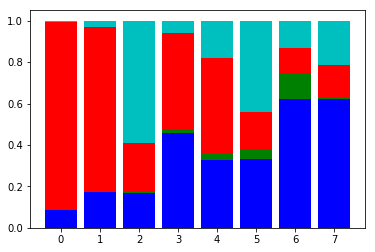

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
couleurs = list()

for couleur in colors.keys():
    couleurs.append(couleur)


#valeurs = {"p1":[0.4, 0.55, 0.05, 0.0], "p2":[0.2, 0.3, 0.5, 0.0], "p3":[0.4, 0.2, 0.2, 0.2], "p4":[0.2, 0.2, 0.2, 0.4], "p5":[0.4, 0.55, 0.05, 0.0], "p6":[0.4, 0.55, 0.05, 0.0], "p7":[0.4, 0.55, 0.05, 0.0]}
colours = ['teal','wheat','aquamarine','navajowhite','darksalmon','cadetblue','coral','limeturquoise','deeppink']

valeurs_freq = dict()
valeurs_prob = dict()

for x in range(0,number_of_slices):   # initialising values[timeperiod] = "list of freq" dictionaries
    valeurs_freq[x] = list()
    valeurs_prob[x] = list()


for x in range(0,number_of_slices):
    list_freq = list()
    list_prob = list()
    total_prob_slice = 0
    
    for sense in correl_pairs.keys():
        #print("\t\t",x,sense)
        list_freq.append(correl_pairs[sense][0][x])
        list_prob.append(correl_pairs[sense][1][x])
        total_prob_slice += correl_pairs[sense][1][x]  # this counts the total probability for Tx, for normalising
        
    valeurs_freq[x] = list_freq
    valeurs_prob[x] = list_prob
    for i in range(0,len(valeurs_prob[x])):
        valeurs_prob[x][i] = valeurs_prob[x][i]/total_prob_slice
    
print("freq")
for key in valeurs_freq:
    print(valeurs_freq[key])
    
print("prob")
for key in valeurs_prob:
    print(valeurs_prob[key])


#for key in valeurs.keys():
    #print(key)
#    list_temp = list()
#    for item in valeurs[key]:
#        list_temp.append(int(item*100))
#    valeurs2[key] = list_temp

    #for value in valeurs
    

#for key,vals in valeurs_freq.items():
#    print(key,vals)
    
#    for i in range(0,len(vals)):        
#        if i == 0:
#            previous = 0
#            plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
#        else:         
#            previous = vals[i-1] + previous
#            plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
#plt.xticks(range(len(valeurs_freq)), valeurs_freq.keys())

#plt.show()

#for key in valeurs.keys():
    #print(key)
#    list_temp = list()
#    for item in valeurs[key]:
#        list_temp.append(int(item*100))
#    valeurs2[key] = list_temp

    #for value in valeurs

previous = 0

for key,vals in valeurs_prob.items():
    print(key,vals)
    
    for i in range(0,len(vals)):        
        if i == 0:
            previous = 0
            plt.bar(x=key, height=vals[i],bottom=previous,color=couleurs[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
        else:         
            previous = vals[i-1] + previous
            plt.bar(x=key, height=vals[i],bottom=previous,color=couleurs[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
plt.xticks(range(len(valeurs_prob)), valeurs_prob.keys())
#plt.figure(figsize=(20,10))
image = plt.gcf()
image.savefig(dir_out+"/"+target_id+param_name+"genre_"+genre+"_i"+str(iterations)+"_k"+str(num_top)+"_time_interval"+str(time_interval)+"_model.png")
plt.show()

plt.show()

## plotting expert

0 [0.075, 0.4, 0.525, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE mus-1 3
TOTAL HITS FOR SENSE NA 16
TOTAL HITS FOR SENSE mus-4 21
TOTAL HITS FOR SENSE mus-2 0
1 [0.5714285714285714, 0.42857142857142855, 0.0, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE mus-1 4
TOTAL HITS FOR SENSE NA 3
TOTAL HITS FOR SENSE mus-4 0
TOTAL HITS FOR SENSE mus-2 0
2 [0.25, 0.75, 0.0, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE mus-1 1
TOTAL HITS FOR SENSE NA 3
TOTAL HITS FOR SENSE mus-4 0
TOTAL HITS FOR SENSE mus-2 0
3 [0.4, 0.4, 0.2, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE mus-1 2
TOTAL HITS FOR SENSE NA 2
TOTAL HITS FOR SENSE mus-4 1
TOTAL HITS FOR SENSE mus-2 0
4 [0.25, 0.75, 0.0, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE mus-1 2
TOTAL HITS FOR SENSE NA 6
TOTAL HITS FOR SENSE mus-4 0
TOTAL HITS FOR SENSE mus-2 0
5 [0.28, 0.3, 0.42, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE mus-1 14
TOTAL HITS FOR SENSE NA 15
TOTAL HITS FOR SENSE mus-4 21
TOTAL HITS FOR SENSE mus-2 0
6 [0.15730337078651685, 0.5056179775

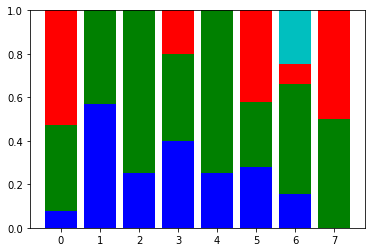

In [118]:
import numpy as np
import matplotlib.pyplot as plt

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
couleurs = list()

for couleur in colors.keys():
    couleurs.append(couleur)


valeurs = period_relative
colours = ['teal','wheat','aquamarine','navajowhite','darksalmon','cadetblue','coral','limeturquoise','magenta','peru']
#colours = ['b','g','r','c','m','y','k','w']
colors = couleurs

for key,vals in valeurs.items():
    print(key,vals)
    print("lenght of vals",len(vals))
    
    
    
    for i in range(0,len(vals)):        
        if i == 0:
            print("TOTAL HITS FOR SENSE",expert_senses[i],sense_date_amount[expert_senses[i],key])
            previous = 0
            #print(i)
            #print(colours[i],"height=",vals[i])
            #plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            plt.bar(x=key, height=vals[i],bottom=previous,color=colors[i])
            
        else:         
            print("TOTAL HITS FOR SENSE",expert_senses[i],sense_date_amount[expert_senses[i],key])
            previous = vals[i-1] + previous
            #print("i",i,"key=period",key)
            #print(colours[i],"height=",vals[i])
            #print(vals[i])
            #plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            plt.bar(x=key, height=vals[i],bottom=previous,color=colors[i])
            
plt.xticks(range(len(valeurs)), valeurs.keys())


#plt.figure(figsize=(20,10))
image = plt.gcf()
image.savefig(dir_out+"/"+target_id+param_name+"genre_"+genre+"_i"+str(iterations)+"_k"+str(num_top)+"_time_interval"+str(time_interval)+"_expert.png")
plt.show()